# WeatherPy
![Equatorsign](/Images/equatorsign.png)
----
# Observations:
* Importing data from with API Call  proved to be challenging

* The temperature gets warmer as you approach the equator and cooler as you get closer to the Southern of Northern Poles

* The random selection of cities from the output CSV returned data on 570 cities

* In the index of cities within the weather_data data frame, none of the cities had humidity over 100% and none of the cities were dropped from the analysis

* The Latitude vs. Temperature Plot shows that the temperature gets coleder as you move away from the equator and warmer as you mover towards the equator

* City Latitude versus city humidity in the latitude versus humidity plot shows that cities between 40 and 100 degrees latitutude have higher and more densly points of higher humidity

* Clouds were evenly dispersed in the city latitude versus city cloudiness latitude versus cloudiness plot

* Wind speeds are clustered aroun the lower latitudes as you approach the equator in the Latitude vs. Wind Speed Plot

* Northern Hemisphere - Max Temp vs. Latitude Linear Regression demonstrates a linear relationship between latitude and temperature

* Southern Hemisphere - Max Temp vs. Latitude Linear Regression demonstrates a more loosely clusterd linear relationship between latitude and temperature than in the northern hemisphere

* Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression demonstrates a linear realtionship between latitude and humidity 

* Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression there does not appear to be a linear relationship between cloudiness and latitude

* Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression there does not appear to be a linear relationship between cloudiness and latitude

* Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression wind speed between 0 an 15 mph is concentrate in 0 degrees to 80 degrees latitude

* Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression wind speed between 0 an 15 mph is concentrate in 0 degrees to -40 degrees latitude


#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Python-API-Challenge

# Python API Homework - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

### Before You Begin

1. Create a new repository for this project called `python-api-challenge`. **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Inside your local git repository, create a directory for both of the Python Challenges. Use a folder name that corresponds to the challenges, such as: **WeatherPy**.

4. Inside the folder you just created, add new files called `WeatherPy.ipynb` and `VacationPy.ipynb`. These will be the main scripts to run for each analysis.

5. Push the above changes to GitHub.

## Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

The first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot, add a sentence or two explaining what the code is analyzing.

The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.



In [3]:
pip install citipy==0.0.5

Note: you may need to restart the kernel to use updated packages.


In [4]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
from scipy import stats
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Set the list to hold city weather data
lat = []
lon = []
temp = []
cloudiness = []
country = []
date = []
humidity = []
temp_max = []
wind_speed = []
city_number = []
city_name = []


   


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [8]:
#loop through cities to get weather information , city ID and city name
print(f'_________________________________________')
print(f'Beginning of city processing')
print(f'_________________________________________')

for city in cities:


    query_url = f"{url}appid={weather_api_key}&units=Imperial&mode=json&q="
    
    weather_response = requests.get(query_url + city).json()
    print(json.dumps(weather_response, indent=4))
    
    try:
 
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        temp.append(weather_response['main']['temp'])
        temp_max.append(weather_response['main']['temp_max'])
        cloudiness.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        wind_speed.append(weather_response['wind']['speed'])
        city_name.append(weather_response['name']) 
        city_number.append(weather_response['id'])   
        #weather_city.append(city)

        print(f'Name: {weather_response["name"]} ID: {weather_response["id"]}') 
    except: KeyError
        
    print(f'City not found. Skipping...') 
    
print('_______________________________________')
print('City weather data retrieval ended')
print('_______________________________________')
        

_________________________________________
Beginning of city processing
_________________________________________
{
    "coord": {
        "lon": 16.5887,
        "lat": 31.2089
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 61.03,
        "feels_like": 53.22,
        "temp_min": 61.03,
        "temp_max": 61.03,
        "pressure": 1016,
        "humidity": 64,
        "sea_level": 1016,
        "grnd_level": 1014
    },
    "visibility": 10000,
    "wind": {
        "speed": 13.42,
        "deg": 52,
        "gust": 17.27
    },
    "clouds": {
        "all": 98
    },
    "dt": 1615683886,
    "sys": {
        "country": "LY",
        "sunrise": 1615698300,
        "sunset": 1615741248
    },
    "timezone": 7200,
    "id": 2210554,
    "name": "Sirte",
    "cod": 200
}
Name: Sirte ID: 2210554
City not f

{
    "coord": {
        "lon": -2.25,
        "lat": 48.4167
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 39.06,
        "feels_like": 30.85,
        "temp_min": 39,
        "temp_max": 39.2,
        "pressure": 1014,
        "humidity": 87
    },
    "visibility": 10000,
    "wind": {
        "speed": 9.22,
        "deg": 250
    },
    "clouds": {
        "all": 90
    },
    "dt": 1615683889,
    "sys": {
        "type": 1,
        "id": 6557,
        "country": "FR",
        "sunrise": 1615703056,
        "sunset": 1615745532
    },
    "timezone": 3600,
    "id": 3021353,
    "name": "Arrondissement de Dinan",
    "cod": 200
}
Name: Arrondissement de Dinan ID: 3021353
City not found. Skipping...
{
    "coord": {
        "lon": -10.0711,
        "lat": 20.5022
    },
    "weather": [
        {
     

{
    "coord": {
        "lon": 153.6167,
        "lat": -28.65
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 82.47,
        "feels_like": 84.67,
        "temp_min": 82,
        "temp_max": 82.99,
        "pressure": 1013,
        "humidity": 65
    },
    "visibility": 10000,
    "wind": {
        "speed": 9.22,
        "deg": 340
    },
    "clouds": {
        "all": 40
    },
    "dt": 1615683892,
    "sys": {
        "type": 1,
        "id": 9496,
        "country": "AU",
        "sunrise": 1615664723,
        "sunset": 1615709065
    },
    "timezone": 39600,
    "id": 2172880,
    "name": "Byron Bay",
    "cod": 200
}
Name: Byron Bay ID: 2172880
City not found. Skipping...
{
    "coord": {
        "lon": -149.8729,
        "lat": -17.4961
    },
    "weather": [
        {
            "id": 801,
   

{
    "coord": {
        "lon": -45.3581,
        "lat": -23.7781
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 76.71,
        "feels_like": 82.76,
        "temp_min": 76.71,
        "temp_max": 76.71,
        "pressure": 1017,
        "humidity": 93,
        "sea_level": 1017,
        "grnd_level": 1016
    },
    "visibility": 10000,
    "wind": {
        "speed": 7.16,
        "deg": 69,
        "gust": 11.03
    },
    "clouds": {
        "all": 41
    },
    "dt": 1615683770,
    "sys": {
        "country": "BR",
        "sunrise": 1615626142,
        "sunset": 1615670369
    },
    "timezone": -10800,
    "id": 3461425,
    "name": "Ilhabela",
    "cod": 200
}
Name: Ilhabela ID: 3461425
City not found. Skipping...
{
    "coord": {
        "lon": -15.8333,
        "lat": 11.2833
    },
    "weather"

{
    "coord": {
        "lon": -24.4956,
        "lat": 14.8961
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 70.23,
        "feels_like": 70.92,
        "temp_min": 70.23,
        "temp_max": 70.23,
        "pressure": 1015,
        "humidity": 75,
        "sea_level": 1015,
        "grnd_level": 1003
    },
    "visibility": 10000,
    "wind": {
        "speed": 5.91,
        "deg": 101,
        "gust": 9.71
    },
    "clouds": {
        "all": 0
    },
    "dt": 1615683900,
    "sys": {
        "country": "CV",
        "sunrise": 1615707981,
        "sunset": 1615751284
    },
    "timezone": -3600,
    "id": 3374210,
    "name": "S\u00e3o Filipe",
    "cod": 200
}
Name: São Filipe ID: 3374210
City not found. Skipping...
{
    "coord": {
        "lon": 13.4655,
        "lat": 59.3232
    },
    "weather": [

{
    "coord": {
        "lon": 128.8694,
        "lat": 71.6872
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -0.08,
        "feels_like": -9.94,
        "temp_min": -0.08,
        "temp_max": -0.08,
        "pressure": 991,
        "humidity": 88,
        "sea_level": 991,
        "grnd_level": 986
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.13,
        "deg": 175,
        "gust": 7.36
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615683905,
    "sys": {
        "country": "RU",
        "sunrise": 1615672479,
        "sunset": 1615713185
    },
    "timezone": 32400,
    "id": 2015306,
    "name": "Tiksi",
    "cod": 200
}
Name: Tiksi ID: 2015306
City not found. Skipping...
{
    "coord": {
        "lon": 31.6833,
        "lat": 59.1167
    },
    "weather": [
        

{
    "coord": {
        "lon": 35.0333,
        "lat": -11.3
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 60.4,
        "feels_like": 61,
        "temp_min": 60.4,
        "temp_max": 60.4,
        "pressure": 1013,
        "humidity": 95,
        "sea_level": 1013,
        "grnd_level": 880
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.07,
        "deg": 50,
        "gust": 4.83
    },
    "clouds": {
        "all": 42
    },
    "dt": 1615683909,
    "sys": {
        "country": "TZ",
        "sunrise": 1615693425,
        "sunset": 1615737271
    },
    "timezone": 10800,
    "id": 877384,
    "name": "Tingi",
    "cod": 200
}
Name: Tingi ID: 877384
City not found. Skipping...
{
    "coord": {
        "lon": -97.8558,
        "lat": 55.7435
    },
    "weather": [
        {
       

{
    "coord": {
        "lon": 18.4232,
        "lat": -33.9258
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 65.64,
        "feels_like": 66.56,
        "temp_min": 64.4,
        "temp_max": 66,
        "pressure": 1015,
        "humidity": 94
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.91,
        "deg": 210
    },
    "clouds": {
        "all": 75
    },
    "dt": 1615683912,
    "sys": {
        "type": 1,
        "id": 1899,
        "country": "ZA",
        "sunrise": 1615697094,
        "sunset": 1615741573
    },
    "timezone": 7200,
    "id": 3369157,
    "name": "Cape Town",
    "cod": 200
}
Name: Cape Town ID: 3369157
City not found. Skipping...
{
    "coord": {
        "lon": 59.5289,
        "lat": 22.5667
    },
    "weather": [
        {
            "id": 800,
          

{
    "coord": {
        "lon": -40.2925,
        "lat": -20.3297
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 76.12,
        "feels_like": 83.01,
        "temp_min": 75.2,
        "temp_max": 77,
        "pressure": 1016,
        "humidity": 88
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.44,
        "deg": 290
    },
    "clouds": {
        "all": 0
    },
    "dt": 1615683916,
    "sys": {
        "type": 1,
        "id": 8474,
        "country": "BR",
        "sunrise": 1615624978,
        "sunset": 1615669102
    },
    "timezone": -10800,
    "id": 3445026,
    "name": "Vila Velha",
    "cod": 200
}
Name: Vila Velha ID: 3445026
City not found. Skipping...
{
    "coord": {
        "lon": 6.1944,
        "lat": 52.6958
    },
    "weather": [
        {
            "id": 804,
            

{
    "coord": {
        "lon": 57.6608,
        "lat": -20.0064
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 77,
        "feels_like": 83.12,
        "temp_min": 77,
        "temp_max": 77,
        "pressure": 1011,
        "humidity": 83
    },
    "visibility": 10000,
    "wind": {
        "speed": 4,
        "deg": 151,
        "gust": 8.01
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615683920,
    "sys": {
        "type": 3,
        "id": 2002134,
        "country": "MU",
        "sunrise": 1615687887,
        "sunset": 1615731951
    },
    "timezone": 14400,
    "id": 934479,
    "name": "Grand Gaube",
    "cod": 200
}
Name: Grand Gaube ID: 934479
City not found. Skipping...
{
    "coord": {
        "lon": -56.1549,
        "lat": 72.7868
    },
    "weather": [
        {
         

{
    "coord": {
        "lon": 150.4667,
        "lat": -35.35
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 55.06,
        "feels_like": 47.55,
        "temp_min": 51.01,
        "temp_max": 57.2,
        "pressure": 1017,
        "humidity": 100
    },
    "visibility": 10000,
    "wind": {
        "speed": 16.11,
        "deg": 170
    },
    "rain": {
        "1h": 0.24
    },
    "clouds": {
        "all": 90
    },
    "dt": 1615683923,
    "sys": {
        "type": 1,
        "id": 9594,
        "country": "AU",
        "sunrise": 1615665359,
        "sunset": 1615709940
    },
    "timezone": 39600,
    "id": 2145554,
    "name": "Ulladulla",
    "cod": 200
}
Name: Ulladulla ID: 2145554
City not found. Skipping...
{
    "coord": {
        "lon": -28.7,
        "lat": 38.5167
    },
    "weather": [
     

{
    "coord": {
        "lon": 149.85,
        "lat": -29.4667
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 73.4,
        "feels_like": 75.47,
        "temp_min": 73.4,
        "temp_max": 73.4,
        "pressure": 1013,
        "humidity": 83
    },
    "visibility": 10000,
    "wind": {
        "speed": 8.05,
        "deg": 10
    },
    "rain": {
        "1h": 0.56
    },
    "clouds": {
        "all": 90
    },
    "dt": 1615683927,
    "sys": {
        "type": 1,
        "id": 9555,
        "country": "AU",
        "sunrise": 1615665614,
        "sunset": 1615709982
    },
    "timezone": 39600,
    "id": 2156927,
    "name": "Moree",
    "cod": 200
}
Name: Moree ID: 2156927
City not found. Skipping...
{
    "coord": {
        "lon": 140.5089,
        "lat": 42.9744
    },
    "weather": [
        {
     

{
    "coord": {
        "lon": -68.3,
        "lat": -54.8
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 44.6,
        "feels_like": 30.9,
        "temp_min": 44.6,
        "temp_max": 44.6,
        "pressure": 1019,
        "humidity": 65
    },
    "visibility": 10000,
    "wind": {
        "speed": 18.41,
        "deg": 230
    },
    "clouds": {
        "all": 75
    },
    "dt": 1615683930,
    "sys": {
        "type": 1,
        "id": 8303,
        "country": "AR",
        "sunrise": 1615630870,
        "sunset": 1615676652
    },
    "timezone": -10800,
    "id": 3833367,
    "name": "Ushuaia",
    "cod": 200
}
Name: Ushuaia ID: 3833367
City not found. Skipping...
{
    "coord": {
        "lon": -97.9031,
        "lat": 31.1241
    },
    "weather": [
        {
            "id": 804,
            "ma

{
    "coord": {
        "lon": -113.5841,
        "lat": 37.1041
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 48.51,
        "feels_like": 43.29,
        "temp_min": 46.99,
        "temp_max": 50,
        "pressure": 1019,
        "humidity": 57
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.44,
        "deg": 180
    },
    "clouds": {
        "all": 1
    },
    "dt": 1615683933,
    "sys": {
        "type": 1,
        "id": 5832,
        "country": "US",
        "sunrise": 1615643271,
        "sunset": 1615685982
    },
    "timezone": -25200,
    "id": 5546220,
    "name": "Saint George",
    "cod": 200
}
Name: Saint George ID: 5546220
City not found. Skipping...
{
    "coord": {
        "lon": 32.2268,
        "lat": -17.397
    },
    "weather": [
        {
            "id": 802,
      

{
    "coord": {
        "lon": 71.1665,
        "lat": 57.6935
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 8.87,
        "feels_like": 0.03,
        "temp_min": 8.87,
        "temp_max": 8.87,
        "pressure": 1026,
        "humidity": 97,
        "sea_level": 1026,
        "grnd_level": 1019
    },
    "visibility": 4553,
    "wind": {
        "speed": 5.23,
        "deg": 234,
        "gust": 11.16
    },
    "clouds": {
        "all": 82
    },
    "dt": 1615683937,
    "sys": {
        "country": "RU",
        "sunrise": 1615685665,
        "sunset": 1615727691
    },
    "timezone": 21600,
    "id": 1488206,
    "name": "Ust'-Ishim",
    "cod": 200
}
Name: Ust'-Ishim ID: 1488206
City not found. Skipping...
{
    "coord": {
        "lon": 138.3297,
        "lat": 46.5389
    },
    "weather": [
  

{
    "coord": {
        "lon": -9.0603,
        "lat": 42.7762
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 45.1,
        "feels_like": 39.36,
        "temp_min": 44.01,
        "temp_max": 46,
        "pressure": 1029,
        "humidity": 95
    },
    "visibility": 10000,
    "wind": {
        "speed": 7.63,
        "deg": 315,
        "gust": 12.01
    },
    "clouds": {
        "all": 10
    },
    "dt": 1615683941,
    "sys": {
        "type": 3,
        "id": 72671,
        "country": "ES",
        "sunrise": 1615704599,
        "sunset": 1615747258
    },
    "timezone": 3600,
    "id": 3115824,
    "name": "Muros",
    "cod": 200
}
Name: Muros ID: 3115824
City not found. Skipping...
{
    "coord": {
        "lon": 26.891,
        "lat": -33.5906
    },
    "weather": [
        {
            "id": 803,


{
    "coord": {
        "lon": 111.9667,
        "lat": 21.85
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 71.56,
        "feels_like": 72.72,
        "temp_min": 71.56,
        "temp_max": 71.56,
        "pressure": 1018,
        "humidity": 77,
        "sea_level": 1018,
        "grnd_level": 1014
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.55,
        "deg": 107,
        "gust": 9.71
    },
    "clouds": {
        "all": 8
    },
    "dt": 1615683943,
    "sys": {
        "country": "CN",
        "sunrise": 1615675321,
        "sunset": 1615718455
    },
    "timezone": 28800,
    "id": 1806408,
    "name": "Yangjiang",
    "cod": 200
}
Name: Yangjiang ID: 1806408
City not found. Skipping...
{
    "coord": {
        "lon": -152.4072,
        "lat": 57.79
    },
    "weather": [
        

{
    "coord": {
        "lon": 114.0833,
        "lat": 71.9167
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -8.86,
        "feels_like": -22.92,
        "temp_min": -8.86,
        "temp_max": -8.86,
        "pressure": 986,
        "humidity": 94,
        "sea_level": 986,
        "grnd_level": 985
    },
    "visibility": 823,
    "wind": {
        "speed": 13.15,
        "deg": 311,
        "gust": 19.44
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615683947,
    "sys": {
        "country": "RU",
        "sunrise": 1615676033,
        "sunset": 1615716727
    },
    "timezone": 32400,
    "id": 2017155,
    "name": "Saskylakh",
    "cod": 200
}
Name: Saskylakh ID: 2017155
City not found. Skipping...
{
    "coord": {
        "lon": 70.8333,
        "lat": 66.8333
    },
    "weather": [

{
    "coord": {
        "lon": 102.5,
        "lat": 71.9667
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -19.52,
        "feels_like": -33.05,
        "temp_min": -19.52,
        "temp_max": -19.52,
        "pressure": 988,
        "humidity": 94,
        "sea_level": 988,
        "grnd_level": 984
    },
    "visibility": 3741,
    "wind": {
        "speed": 11.83,
        "deg": 238,
        "gust": 25.48
    },
    "clouds": {
        "all": 78
    },
    "dt": 1615683950,
    "sys": {
        "country": "RU",
        "sunrise": 1615678807,
        "sunset": 1615719512
    },
    "timezone": 25200,
    "id": 2022572,
    "name": "Khatanga",
    "cod": 200
}
Name: Khatanga ID: 2022572
City not found. Skipping...
{
    "coord": {
        "lon": 103.5347,
        "lat": 48.8125
    },
    "weather": [
  

{
    "coord": {
        "lon": 81.1185,
        "lat": 6.1241
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 73.4,
        "feels_like": 80.91,
        "temp_min": 73.4,
        "temp_max": 73.4,
        "pressure": 1010,
        "humidity": 100
    },
    "visibility": 9000,
    "wind": {
        "speed": 3.44,
        "deg": 20
    },
    "clouds": {
        "all": 20
    },
    "dt": 1615683953,
    "sys": {
        "type": 1,
        "id": 9124,
        "country": "LK",
        "sunrise": 1615682555,
        "sunset": 1615726025
    },
    "timezone": 19800,
    "id": 1244926,
    "name": "Hambantota",
    "cod": 200
}
Name: Hambantota ID: 1244926
City not found. Skipping...
{
    "coord": {
        "lon": 129.5078,
        "lat": 42.9075
    },
    "weather": [
        {
            "id": 800,
           

{
    "coord": {
        "lon": -121.4238,
        "lat": 38.421
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 60.58,
        "feels_like": 53.44,
        "temp_min": 59,
        "temp_max": 62.01,
        "pressure": 1023,
        "humidity": 55
    },
    "visibility": 10000,
    "wind": {
        "speed": 10.36,
        "deg": 210,
        "gust": 17.27
    },
    "clouds": {
        "all": 1
    },
    "dt": 1615683908,
    "sys": {
        "type": 1,
        "id": 5769,
        "country": "US",
        "sunrise": 1615645170,
        "sunset": 1615687846
    },
    "timezone": -28800,
    "id": 5364271,
    "name": "Laguna",
    "cod": 200
}
Name: Laguna ID: 5364271
City not found. Skipping...
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
    "coord": {
        "lon": 13

{
    "coord": {
        "lon": 135.8667,
        "lat": -34.7333
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 59.72,
        "feels_like": 52.99,
        "temp_min": 59.72,
        "temp_max": 59.72,
        "pressure": 1027,
        "humidity": 51,
        "sea_level": 1027,
        "grnd_level": 1025
    },
    "visibility": 10000,
    "wind": {
        "speed": 8.57,
        "deg": 192,
        "gust": 9.15
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615683962,
    "sys": {
        "country": "AU",
        "sunrise": 1615668877,
        "sunset": 1615713429
    },
    "timezone": 37800,
    "id": 2063036,
    "name": "Port Lincoln",
    "cod": 200
}
Name: Port Lincoln ID: 2063036
City not found. Skipping...
{
    "coord": {
        "lon": -52.7314,
        "lat": 47.6666
    },
    "w

{
    "coord": {
        "lon": -52.95,
        "lat": 5.3833
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 77.59,
        "feels_like": 80.44,
        "temp_min": 77.59,
        "temp_max": 77.59,
        "pressure": 1014,
        "humidity": 88,
        "sea_level": 1014,
        "grnd_level": 1013
    },
    "visibility": 10000,
    "wind": {
        "speed": 12.06,
        "deg": 45,
        "gust": 18.75
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615683965,
    "sys": {
        "country": "GF",
        "sunrise": 1615628340,
        "sunset": 1615671815
    },
    "timezone": -10800,
    "id": 3380290,
    "name": "Sinnamary",
    "cod": 200
}
Name: Sinnamary ID: 3380290
City not found. Skipping...
{
    "coord": {
        "lon": 25.1361,
        "lat": 5.0314
    },
    "weather": [

{
    "coord": {
        "lon": -122.7002,
        "lat": 58.8053
    },
    "weather": [
        {
            "id": 601,
            "main": "Snow",
            "description": "snow",
            "icon": "13d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 3.2,
        "feels_like": -9.08,
        "temp_min": 3.2,
        "temp_max": 3.2,
        "pressure": 1020,
        "humidity": 72
    },
    "visibility": 8047,
    "wind": {
        "speed": 10.36,
        "deg": 20
    },
    "clouds": {
        "all": 90
    },
    "dt": 1615683969,
    "sys": {
        "type": 1,
        "id": 986,
        "country": "CA",
        "sunrise": 1615645904,
        "sunset": 1615687724
    },
    "timezone": -25200,
    "id": 5955902,
    "name": "Fort Nelson",
    "cod": 200
}
Name: Fort Nelson ID: 5955902
City not found. Skipping...
{
    "coord": {
        "lon": -20.2734,
        "lat": 63.4427
    },
    "weather": [
        {
            "id": 804,
            "main

{
    "coord": {
        "lon": 105.15,
        "lat": 9.1769
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 81.39,
        "feels_like": 82.8,
        "temp_min": 81.39,
        "temp_max": 81.39,
        "pressure": 1013,
        "humidity": 66,
        "sea_level": 1013,
        "grnd_level": 1012
    },
    "visibility": 10000,
    "wind": {
        "speed": 10.11,
        "deg": 101,
        "gust": 16.42
    },
    "clouds": {
        "all": 99
    },
    "dt": 1615683972,
    "sys": {
        "country": "VN",
        "sunrise": 1615676821,
        "sunset": 1615720226
    },
    "timezone": 25200,
    "id": 1586443,
    "name": "Ca Mau",
    "cod": 200
}
Name: Ca Mau ID: 1586443
City not found. Skipping...
{
    "coord": {
        "lon": -79.8667,
        "lat": 8.55
    },
    "weather": [
        

{
    "coord": {
        "lon": 88.3972,
        "lat": 69.4865
    },
    "weather": [
        {
            "id": 600,
            "main": "Snow",
            "description": "light snow",
            "icon": "13d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -21.64,
        "feels_like": -33.74,
        "temp_min": -21.64,
        "temp_max": -21.64,
        "pressure": 999,
        "humidity": 98,
        "sea_level": 999,
        "grnd_level": 990
    },
    "visibility": 195,
    "wind": {
        "speed": 9.24,
        "deg": 134,
        "gust": 12.62
    },
    "snow": {
        "1h": 0.16
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615683975,
    "sys": {
        "country": "RU",
        "sunrise": 1615682010,
        "sunset": 1615723077
    },
    "timezone": 25200,
    "id": 1490256,
    "name": "Talnakh",
    "cod": 200
}
Name: Talnakh ID: 1490256
City not found. Skipping...
{
    "coord": {
        "lon": 93.0344,
        "lat": 5

{
    "coord": {
        "lon": 46.7219,
        "lat": 24.6877
    },
    "weather": [
        {
            "id": 761,
            "main": "Dust",
            "description": "dust",
            "icon": "50n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 58.32,
        "feels_like": 50.86,
        "temp_min": 57.2,
        "temp_max": 59,
        "pressure": 1017,
        "humidity": 31
    },
    "visibility": 3000,
    "wind": {
        "speed": 5.88,
        "deg": 36,
        "gust": 7.63
    },
    "clouds": {
        "all": 99
    },
    "dt": 1615683980,
    "sys": {
        "type": 1,
        "id": 7426,
        "country": "SA",
        "sunrise": 1615691000,
        "sunset": 1615734087
    },
    "timezone": 10800,
    "id": 108410,
    "name": "Riyadh",
    "cod": 200
}
Name: Riyadh ID: 108410
City not found. Skipping...
{
    "coord": {
        "lon": -3.36,
        "lat": 40.4821
    },
    "weather": [
        {
            "id": 800,
           

{
    "coord": {
        "lon": 50.8122,
        "lat": 9.4942
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 77.88,
        "feels_like": 80.55,
        "temp_min": 77.88,
        "temp_max": 77.88,
        "pressure": 1012,
        "humidity": 75,
        "sea_level": 1012,
        "grnd_level": 1010
    },
    "visibility": 10000,
    "wind": {
        "speed": 8.21,
        "deg": 41,
        "gust": 9.93
    },
    "clouds": {
        "all": 99
    },
    "dt": 1615683983,
    "sys": {
        "country": "SO",
        "sunrise": 1615689860,
        "sunset": 1615733264
    },
    "timezone": 10800,
    "id": 64814,
    "name": "Bandarbeyla",
    "cod": 200
}
Name: Bandarbeyla ID: 64814
City not found. Skipping...
{
    "coord": {
        "lon": 37.8879,
        "lat": 51.1537
    },
    "weather": [
 

{
    "coord": {
        "lon": 31.8996,
        "lat": 54.4299
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 33.35,
        "feels_like": 25.36,
        "temp_min": 33.35,
        "temp_max": 33.35,
        "pressure": 1006,
        "humidity": 98,
        "sea_level": 1006,
        "grnd_level": 983
    },
    "visibility": 217,
    "wind": {
        "speed": 8.05,
        "deg": 209,
        "gust": 15.48
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615683987,
    "sys": {
        "country": "RU",
        "sunrise": 1615694992,
        "sunset": 1615737208
    },
    "timezone": 10800,
    "id": 525426,
    "name": "Sobolevo",
    "cod": 200
}
Name: Sobolevo ID: 525426
City not found. Skipping...
{
    "coord": {
        "lon": 30.2352,
        "lat": -13.2325
    },
    "weather": [
   

{
    "coord": {
        "lon": -68.0591,
        "lat": -38.9516
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 71.6,
        "feels_like": 71.4,
        "temp_min": 71.6,
        "temp_max": 71.6,
        "pressure": 1012,
        "humidity": 53
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.3,
        "deg": 360
    },
    "clouds": {
        "all": 0
    },
    "dt": 1615683990,
    "sys": {
        "type": 1,
        "id": 8310,
        "country": "AR",
        "sunrise": 1615631308,
        "sunset": 1615676098
    },
    "timezone": -10800,
    "id": 3843123,
    "name": "Neuqu\u00e9n",
    "cod": 200
}
Name: Neuquén ID: 3843123
City not found. Skipping...
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
    "coord": {
        "lon": -125.2446,
        "

{
    "coord": {
        "lon": 54.3241,
        "lat": 60.3071
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 13.57,
        "feels_like": 1.89,
        "temp_min": 13.57,
        "temp_max": 13.57,
        "pressure": 1019,
        "humidity": 90,
        "sea_level": 1019,
        "grnd_level": 999
    },
    "visibility": 5046,
    "wind": {
        "speed": 10.63,
        "deg": 217,
        "gust": 29.12
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615683994,
    "sys": {
        "country": "RU",
        "sunrise": 1615689774,
        "sunset": 1615731665
    },
    "timezone": 18000,
    "id": 561698,
    "name": "Gayny",
    "cod": 200
}
Name: Gayny ID: 561698
City not found. Skipping...
{
    "coord": {
        "lon": -8.3327,
        "lat": 40.1629
    },
    "weather": [
        {

{
    "coord": {
        "lon": 72.8667,
        "lat": 29.8
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 62.15,
        "feels_like": 56.52,
        "temp_min": 62.15,
        "temp_max": 62.15,
        "pressure": 1014,
        "humidity": 36,
        "sea_level": 1014,
        "grnd_level": 996
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.43,
        "deg": 51,
        "gust": 5.77
    },
    "clouds": {
        "all": 0
    },
    "dt": 1615683997,
    "sys": {
        "country": "PK",
        "sunrise": 1615684788,
        "sunset": 1615727752
    },
    "timezone": 18000,
    "id": 1181073,
    "name": "Chishtian",
    "cod": 200
}
Name: Chishtian ID: 1181073
City not found. Skipping...
{
    "coord": {
        "lon": 173.1667,
        "lat": -35.1667
    },
    "weather": [
        {


{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
    "coord": {
        "lon": 126.2925,
        "lat": 58.9564
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 18.55,
        "feels_like": 8.87,
        "temp_min": 18.55,
        "temp_max": 18.55,
        "pressure": 1004,
        "humidity": 83,
        "sea_level": 1004,
        "grnd_level": 968
    },
    "visibility": 10000,
    "wind": {
        "speed": 7.47,
        "deg": 269,
        "gust": 15.21
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615684001,
    "sys": {
        "country": "RU",
        "sunrise": 1615672497,
        "sunset": 1615714404
    },
    "timezone": 32400,
    "id": 2015179,
    "name": "Tommot"

{
    "coord": {
        "lon": 16.139,
        "lat": 29.1614
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 63.07,
        "feels_like": 49.21,
        "temp_min": 63.07,
        "temp_max": 63.07,
        "pressure": 1015,
        "humidity": 32,
        "sea_level": 1015,
        "grnd_level": 985
    },
    "visibility": 10000,
    "wind": {
        "speed": 18.45,
        "deg": 116,
        "gust": 30.69
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615684005,
    "sys": {
        "country": "LY",
        "sunrise": 1615698384,
        "sunset": 1615741380
    },
    "timezone": 7200,
    "id": 2209055,
    "name": "Wadd\u0101n",
    "cod": 200
}
Name: Waddān ID: 2209055
City not found. Skipping...
{
    "coord": {
        "lon": 111.8935,
        "lat": -8.1181
    },
    "weather": [

{
    "coord": {
        "lon": 22.7882,
        "lat": 10.2849
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 81.12,
        "feels_like": 73.67,
        "temp_min": 81.12,
        "temp_max": 81.12,
        "pressure": 1004,
        "humidity": 17,
        "sea_level": 1004,
        "grnd_level": 953
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.93,
        "deg": 73,
        "gust": 28.7
    },
    "clouds": {
        "all": 24
    },
    "dt": 1615684008,
    "sys": {
        "country": "CF",
        "sunrise": 1615696592,
        "sunset": 1615739981
    },
    "timezone": 3600,
    "id": 240210,
    "name": "Birao",
    "cod": 200
}
Name: Birao ID: 240210
City not found. Skipping...
{
    "coord": {
        "lon": 73.0833,
        "lat": -0.6
    },
    "weather": [
        {
          

{
    "coord": {
        "lon": 153.4167,
        "lat": -28.9833
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 82.26,
        "feels_like": 84.34,
        "temp_min": 82,
        "temp_max": 82.4,
        "pressure": 1013,
        "humidity": 65
    },
    "visibility": 10000,
    "wind": {
        "speed": 9.22,
        "deg": 340
    },
    "clouds": {
        "all": 40
    },
    "dt": 1615684012,
    "sys": {
        "type": 1,
        "id": 9496,
        "country": "AU",
        "sunrise": 1615664765,
        "sunset": 1615709118
    },
    "timezone": 39600,
    "id": 2177254,
    "name": "Bagotville",
    "cod": 200
}
Name: Bagotville ID: 2177254
City not found. Skipping...
{
    "coord": {
        "lon": 153.6833,
        "lat": 67.45
    },
    "weather": [
        {
            "id": 803,
    

{
    "coord": {
        "lon": 148.6167,
        "lat": -32.25
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 66.2,
        "feels_like": 63.84,
        "temp_min": 66.2,
        "temp_max": 66.2,
        "pressure": 1015,
        "humidity": 82
    },
    "visibility": 10000,
    "wind": {
        "speed": 10.36,
        "deg": 200
    },
    "rain": {
        "1h": 0.13
    },
    "clouds": {
        "all": 75
    },
    "dt": 1615684015,
    "sys": {
        "type": 1,
        "id": 9596,
        "country": "AU",
        "sunrise": 1615665862,
        "sunset": 1615710326
    },
    "timezone": 39600,
    "id": 2168305,
    "name": "Dubbo",
    "cod": 200
}
Name: Dubbo ID: 2168305
City not found. Skipping...
{
    "coord": {
        "lon": -72.4167,
        "lat": -35.3333
    },
    "weather": [
        {
  

{
    "coord": {
        "lon": 72.7833,
        "lat": 24.4833
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 70.11,
        "feels_like": 63.43,
        "temp_min": 70.11,
        "temp_max": 70.11,
        "pressure": 1012,
        "humidity": 22,
        "sea_level": 1012,
        "grnd_level": 982
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.88,
        "deg": 27,
        "gust": 5.88
    },
    "clouds": {
        "all": 0
    },
    "dt": 1615684019,
    "sys": {
        "country": "IN",
        "sunrise": 1615684748,
        "sunset": 1615727833
    },
    "timezone": 19800,
    "id": 1279394,
    "name": "\u0100bu Road",
    "cod": 200
}
Name: Ābu Road ID: 1279394
City not found. Skipping...
{
    "coord": {
        "lon": 135.9833,
        "lat": 33.7333
    },
    "weather": [
     

{
    "coord": {
        "lon": 49.1816,
        "lat": 11.2842
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 75.36,
        "feels_like": 76.86,
        "temp_min": 75.36,
        "temp_max": 75.36,
        "pressure": 1012,
        "humidity": 76,
        "sea_level": 1012,
        "grnd_level": 1011
    },
    "visibility": 10000,
    "wind": {
        "speed": 8.55,
        "deg": 168,
        "gust": 11.18
    },
    "clouds": {
        "all": 0
    },
    "dt": 1615684022,
    "sys": {
        "country": "SO",
        "sunrise": 1615690270,
        "sunset": 1615733637
    },
    "timezone": 10800,
    "id": 64013,
    "name": "Bosaso",
    "cod": 200
}
Name: Bosaso ID: 64013
City not found. Skipping...
{
    "coord": {
        "lon": -122.6762,
        "lat": 45.5234
    },
    "weather": [
        {
    

{
    "coord": {
        "lon": 13.45,
        "lat": -5.8167
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 76.46,
        "feels_like": 86.02,
        "temp_min": 76.46,
        "temp_max": 76.46,
        "pressure": 1009,
        "humidity": 98,
        "sea_level": 1009,
        "grnd_level": 1006
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.3,
        "deg": 249,
        "gust": 3.31
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615684025,
    "sys": {
        "country": "CD",
        "sunrise": 1615698666,
        "sunset": 1615742388
    },
    "timezone": 3600,
    "id": 2313002,
    "name": "Matadi",
    "cod": 200
}
Name: Matadi ID: 2313002
City not found. Skipping...
{
    "coord": {
        "lon": 80.5464,
        "lat": 73.5069
    },
    "weather": [
        

{
    "coord": {
        "lon": -77.9956,
        "lat": 20.7147
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 73.83,
        "feels_like": 69.19,
        "temp_min": 73.83,
        "temp_max": 73.83,
        "pressure": 1018,
        "humidity": 73,
        "sea_level": 1018,
        "grnd_level": 1018
    },
    "visibility": 10000,
    "wind": {
        "speed": 17.34,
        "deg": 43,
        "gust": 26.98
    },
    "clouds": {
        "all": 0
    },
    "dt": 1615684029,
    "sys": {
        "country": "CU",
        "sunrise": 1615634524,
        "sunset": 1615677650
    },
    "timezone": -18000,
    "id": 3537840,
    "name": "Santa Cruz del Sur",
    "cod": 200
}
Name: Santa Cruz del Sur ID: 3537840
City not found. Skipping...
{
    "coord": {
        "lon": 15.1594,
        "lat": -26.6481
    },
  

{
    "coord": {
        "lon": 122.8766,
        "lat": -0.9131
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 82.08,
        "feels_like": 89.62,
        "temp_min": 82.08,
        "temp_max": 82.08,
        "pressure": 1012,
        "humidity": 71,
        "sea_level": 1012,
        "grnd_level": 991
    },
    "visibility": 10000,
    "wind": {
        "speed": 1.74,
        "deg": 92,
        "gust": 2.39
    },
    "clouds": {
        "all": 89
    },
    "dt": 1615684032,
    "sys": {
        "country": "ID",
        "sunrise": 1615672461,
        "sunset": 1615716079
    },
    "timezone": 28800,
    "id": 1637001,
    "name": "Biak",
    "cod": 200
}
Name: Biak ID: 1637001
City not found. Skipping...
{
    "coord": {
        "lon": 122.6711,
        "lat": 10.9995
    },
    "weather": [
        {

{
    "coord": {
        "lon": 129.5531,
        "lat": 33.3597
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 57.43,
        "feels_like": 55.96,
        "temp_min": 51.8,
        "temp_max": 61,
        "pressure": 1021,
        "humidity": 87
    },
    "visibility": 9000,
    "wind": {
        "speed": 4.61,
        "deg": 220
    },
    "clouds": {
        "all": 75
    },
    "dt": 1615684036,
    "sys": {
        "type": 1,
        "id": 8000,
        "country": "JP",
        "sunrise": 1615671239,
        "sunset": 1615714097
    },
    "timezone": 32400,
    "id": 1862555,
    "name": "Hirado",
    "cod": 200
}
Name: Hirado ID: 1862555
City not found. Skipping...
{
    "coord": {
        "lon": -121.9166,
        "lat": 36.6177
    },
    "weather": [
        {
            "id": 800,
            "m

{
    "coord": {
        "lon": -105.2,
        "lat": 20.7
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 74.1,
        "feels_like": 72.18,
        "temp_min": 73,
        "temp_max": 75.2,
        "pressure": 1015,
        "humidity": 69
    },
    "visibility": 10000,
    "wind": {
        "speed": 11.5,
        "deg": 180
    },
    "clouds": {
        "all": 20
    },
    "dt": 1615684040,
    "sys": {
        "type": 1,
        "id": 7156,
        "country": "MX",
        "sunrise": 1615641049,
        "sunset": 1615684180
    },
    "timezone": -21600,
    "id": 4004293,
    "name": "Ixtapa",
    "cod": 200
}
Name: Ixtapa ID: 4004293
City not found. Skipping...
{
    "coord": {
        "lon": -59.4307,
        "lat": -34.6515
    },
    "weather": [
        {
            "id": 800,
            "main": "

{
    "coord": {
        "lon": 128.7333,
        "lat": -15.7667
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 87.8,
        "feels_like": 95.09,
        "temp_min": 87.8,
        "temp_max": 87.8,
        "pressure": 1011,
        "humidity": 74
    },
    "visibility": 10000,
    "wind": {
        "speed": 9.22,
        "deg": 180
    },
    "clouds": {
        "all": 40
    },
    "dt": 1615684043,
    "sys": {
        "type": 1,
        "id": 9587,
        "country": "AU",
        "sunrise": 1615670882,
        "sunset": 1615714848
    },
    "timezone": 28800,
    "id": 2068110,
    "name": "Kununurra",
    "cod": 200
}
Name: Kununurra ID: 2068110
City not found. Skipping...
{
    "coord": {
        "lon": -90.0348,
        "lat": 34.9554
    },
    "weather": [
        {
            "id": 803,
   

{
    "coord": {
        "lon": 37.2913,
        "lat": 50.8448
    },
    "weather": [
        {
            "id": 701,
            "main": "Mist",
            "description": "mist",
            "icon": "50n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 28.4,
        "feels_like": 21.81,
        "temp_min": 28.4,
        "temp_max": 28.4,
        "pressure": 1016,
        "humidity": 100
    },
    "visibility": 2800,
    "wind": {
        "speed": 4.47,
        "deg": 160
    },
    "clouds": {
        "all": 90
    },
    "dt": 1615684047,
    "sys": {
        "type": 1,
        "id": 9030,
        "country": "RU",
        "sunrise": 1615693625,
        "sunset": 1615735988
    },
    "timezone": 10800,
    "id": 578283,
    "name": "Spornoye",
    "cod": 200
}
Name: Spornoye ID: 578283
City not found. Skipping...
{
    "coord": {
        "lon": -45.2371,
        "lat": 60.1432
    },
    "weather": [
        {
            "id": 804,
            "main": "Cl

{
    "coord": {
        "lon": -61.7659,
        "lat": 16.0589
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 75.2,
        "feels_like": 79.2,
        "temp_min": 75.2,
        "temp_max": 75.2,
        "pressure": 1016,
        "humidity": 78
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.61,
        "deg": 40
    },
    "clouds": {
        "all": 0
    },
    "dt": 1615684050,
    "sys": {
        "type": 1,
        "id": 8780,
        "country": "GP",
        "sunrise": 1615630577,
        "sunset": 1615673808
    },
    "timezone": -14400,
    "id": 3578278,
    "name": "Vieux-Habitants",
    "cod": 200
}
Name: Vieux-Habitants ID: 3578278
City not found. Skipping...
{
    "coord": {
        "lon": -151.0167,
        "lat": -16.7
    },
    "weather": [
        {
            "id": 800,
   

{
    "coord": {
        "lon": 68.3,
        "lat": 40.7333
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 32.74,
        "feels_like": 15.73,
        "temp_min": 32.74,
        "temp_max": 32.74,
        "pressure": 1023,
        "humidity": 53,
        "sea_level": 1023,
        "grnd_level": 990
    },
    "visibility": 10000,
    "wind": {
        "speed": 20.92,
        "deg": 265,
        "gust": 29.06
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615684054,
    "sys": {
        "country": "KZ",
        "sunrise": 1615686025,
        "sunset": 1615728707
    },
    "timezone": 21600,
    "id": 1516595,
    "name": "Zhetysay",
    "cod": 200
}
Name: Zhetysay ID: 1516595
City not found. Skipping...
{
    "coord": {
        "lon": -77.1167,
        "lat": 20.3433
    },
    "weather": [
 

{
    "coord": {
        "lon": -135.0107,
        "lat": 68.2191
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -2.2,
        "feels_like": -12.15,
        "temp_min": -2.2,
        "temp_max": -2.2,
        "pressure": 1035,
        "humidity": 60
    },
    "visibility": 10000,
    "wind": {
        "speed": 5.75,
        "deg": 120
    },
    "clouds": {
        "all": 1
    },
    "dt": 1615684057,
    "sys": {
        "type": 1,
        "id": 821,
        "country": "CA",
        "sunrise": 1615649252,
        "sunset": 1615690284
    },
    "timezone": -25200,
    "id": 5882953,
    "name": "Aklavik",
    "cod": 200
}
Name: Aklavik ID: 5882953
City not found. Skipping...
{
    "coord": {
        "lon": -17.9182,
        "lat": 28.6585
    },
    "weather": [
        {
            "id": 803,
            "ma

{
    "coord": {
        "lon": 17.9442,
        "lat": -33.0117
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 68,
        "feels_like": 71.04,
        "temp_min": 68,
        "temp_max": 68,
        "pressure": 1014,
        "humidity": 88
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.44,
        "deg": 260
    },
    "clouds": {
        "all": 99
    },
    "dt": 1615684061,
    "sys": {
        "type": 1,
        "id": 1943,
        "country": "ZA",
        "sunrise": 1615697225,
        "sunset": 1615741672
    },
    "timezone": 7200,
    "id": 3361934,
    "name": "Saldanha",
    "cod": 200
}
Name: Saldanha ID: 3361934
City not found. Skipping...
{
    "coord": {
        "lon": 127.8686,
        "lat": 26.3544
    },
    "weather": [
        {
            "id": 803,
            "m

{
    "coord": {
        "lon": 121.4443,
        "lat": 17.4189
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 75.38,
        "feels_like": 77.79,
        "temp_min": 75.38,
        "temp_max": 75.38,
        "pressure": 1015,
        "humidity": 78,
        "sea_level": 1015,
        "grnd_level": 994
    },
    "visibility": 10000,
    "wind": {
        "speed": 7.56,
        "deg": 343,
        "gust": 12.62
    },
    "clouds": {
        "all": 84
    },
    "dt": 1615684064,
    "sys": {
        "country": "PH",
        "sunrise": 1615672999,
        "sunset": 1615716228
    },
    "timezone": 28800,
    "id": 1684803,
    "name": "Tabuk",
    "cod": 200
}
Name: Tabuk ID: 1684803
City not found. Skipping...
{
    "coord": {
        "lon": -81.2354,
        "lat": 32.296
    },
    "weather": [
        

{
    "coord": {
        "lon": 140.5894,
        "lat": 40.7072
    },
    "weather": [
        {
            "id": 501,
            "main": "Rain",
            "description": "moderate rain",
            "icon": "10d"
        },
        {
            "id": 741,
            "main": "Fog",
            "description": "fog",
            "icon": "50d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 39.27,
        "feels_like": 35.62,
        "temp_min": 35.6,
        "temp_max": 43,
        "pressure": 1006,
        "humidity": 100
    },
    "visibility": 5000,
    "wind": {
        "speed": 2.3,
        "deg": 120
    },
    "rain": {
        "1h": 1.15
    },
    "clouds": {
        "all": 75
    },
    "dt": 1615684068,
    "sys": {
        "type": 1,
        "id": 8044,
        "country": "JP",
        "sunrise": 1615668695,
        "sunset": 1615711345
    },
    "timezone": 32400,
    "id": 2129005,
    "name": "Namioka",
    "cod": 200
}
Name: Namioka ID: 21

{
    "coord": {
        "lon": -54.3833,
        "lat": 4.25
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 72.23,
        "feels_like": 79.34,
        "temp_min": 72.23,
        "temp_max": 72.23,
        "pressure": 1013,
        "humidity": 98,
        "sea_level": 1013,
        "grnd_level": 1006
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.44,
        "deg": 15,
        "gust": 5.7
    },
    "clouds": {
        "all": 18
    },
    "dt": 1615684071,
    "sys": {
        "country": "GF",
        "sunrise": 1615628671,
        "sunset": 1615672172
    },
    "timezone": -10800,
    "id": 3381538,
    "name": "Grand-Santi",
    "cod": 200
}
Name: Grand-Santi ID: 3381538
City not found. Skipping...
{
    "coord": {
        "lon": 121.5167,
        "lat": 50.7833
    },
    "weather": [
  

{
    "coord": {
        "lon": 97.5228,
        "lat": 50.5994
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -3.26,
        "feels_like": -18.02,
        "temp_min": -3.26,
        "temp_max": -3.26,
        "pressure": 1036,
        "humidity": 75,
        "sea_level": 1036,
        "grnd_level": 870
    },
    "visibility": 10000,
    "wind": {
        "speed": 14.45,
        "deg": 301,
        "gust": 26.04
    },
    "clouds": {
        "all": 72
    },
    "dt": 1615684074,
    "sys": {
        "country": "RU",
        "sunrise": 1615679187,
        "sunset": 1615721520
    },
    "timezone": 25200,
    "id": 1501377,
    "name": "Kungurtug",
    "cod": 200
}
Name: Kungurtug ID: 1501377
City not found. Skipping...
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
{
   

{
    "coord": {
        "lon": 93.6833,
        "lat": 22.9167
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 61.59,
        "feels_like": 58.46,
        "temp_min": 61.59,
        "temp_max": 61.59,
        "pressure": 1013,
        "humidity": 54,
        "sea_level": 1013,
        "grnd_level": 854
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.4,
        "deg": 284,
        "gust": 4.32
    },
    "clouds": {
        "all": 0
    },
    "dt": 1615684078,
    "sys": {
        "country": "MM",
        "sunrise": 1615679718,
        "sunset": 1615722832
    },
    "timezone": 23400,
    "id": 1326105,
    "name": "Falam",
    "cod": 200
}
Name: Falam ID: 1326105
City not found. Skipping...
{
    "coord": {
        "lon": -72.7824,
        "lat": 47.4334
    },
    "weather": [
        {
      

{
    "coord": {
        "lon": 18.0667,
        "lat": 1.6381
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 73.29,
        "feels_like": 78.48,
        "temp_min": 73.29,
        "temp_max": 73.29,
        "pressure": 1008,
        "humidity": 84,
        "sea_level": 1008,
        "grnd_level": 972
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.73,
        "deg": 253,
        "gust": 4.07
    },
    "clouds": {
        "all": 100
    },
    "dt": 1615684082,
    "sys": {
        "country": "CG",
        "sunrise": 1615697637,
        "sunset": 1615741202
    },
    "timezone": 3600,
    "id": 2259655,
    "name": "Impfondo",
    "cod": 200
}
Name: Impfondo ID: 2259655
City not found. Skipping...
{
    "coord": {
        "lon": 35.3833,
        "lat": -23.865
    },
    "weather": [
   

{
    "coord": {
        "lon": 121.655,
        "lat": 31.8111
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 54.68,
        "feels_like": 51.19,
        "temp_min": 52,
        "temp_max": 57,
        "pressure": 1020,
        "humidity": 69
    },
    "visibility": 10000,
    "wind": {
        "speed": 4,
        "deg": 135,
        "gust": 11.01
    },
    "clouds": {
        "all": 0
    },
    "dt": 1615684086,
    "sys": {
        "type": 3,
        "id": 2037766,
        "country": "CN",
        "sunrise": 1615673113,
        "sunset": 1615716013
    },
    "timezone": 28800,
    "id": 1806840,
    "name": "Huilong",
    "cod": 200
}
Name: Huilong ID: 1806840
City not found. Skipping...
{
    "coord": {
        "lon": 159.95,
        "lat": -9.4333
    },
    "weather": [
        {
            "id": 804,


{
    "coord": {
        "lon": -76.5119,
        "lat": 38.8876
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 43.05,
        "feels_like": 34.81,
        "temp_min": 41,
        "temp_max": 46.4,
        "pressure": 1023,
        "humidity": 42
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.02,
        "deg": 218,
        "gust": 8.1
    },
    "clouds": {
        "all": 1
    },
    "dt": 1615684089,
    "sys": {
        "type": 1,
        "id": 5056,
        "country": "US",
        "sunrise": 1615634410,
        "sunset": 1615677052
    },
    "timezone": -18000,
    "id": 4362001,
    "name": "Mayo",
    "cod": 200
}
Name: Mayo ID: 4362001
City not found. Skipping...
{
    "coord": {
        "lon": 36.8642,
        "lat": 55.9178
    },
    "weather": [
        {
            "id": 600,
   

{
    "coord": {
        "lon": -96.4661,
        "lat": 15.7432
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 80.6,
        "feels_like": 84.72,
        "temp_min": 80.6,
        "temp_max": 80.6,
        "pressure": 1013,
        "humidity": 69
    },
    "visibility": 10000,
    "wind": {
        "speed": 5.75,
        "deg": 210
    },
    "clouds": {
        "all": 40
    },
    "dt": 1615684093,
    "sys": {
        "type": 1,
        "id": 7157,
        "country": "MX",
        "sunrise": 1615638897,
        "sunset": 1615682141
    },
    "timezone": -21600,
    "id": 3517970,
    "name": "Pochutla",
    "cod": 200
}
Name: Pochutla ID: 3517970
City not found. Skipping...
{
    "coord": {
        "lon": -56.0861,
        "lat": -9.8756
    },
    "weather": [
        {
            "id": 804,
     

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Set up a dictionary for city weather parameters
weather_dict = {
    #"weather city": weather_city,
    "Lat": lat, 
    "Lng": lon, 
    "Temperature": temp,
    "Cloudiness": cloudiness, 
    "Country": country, 
    "Date": date, 
    "Humidity": humidity,
    "Temperature Max": temp_max,
    "Wind Speed": wind_speed, 
    "City Number": city_number, 
    "City Name": city_name  
}

weather_data = pd.DataFrame({k: pd.Series(l) for k, l in weather_dict.items()})
weather_data.head()


,Lat,Lng,Temperature,Cloudiness,Country,Date,Humidity,Temperature Max,Wind Speed,City Number,City Name
0,31.2089,16.5887,61.03,98,LY,1615683886,64,61.03,13.42,2210554,Sirte
1,-23.1203,-134.9692,80.51,37,PF,1615683886,73,80.51,8.70,4030556,Rikitea
2,64.2539,-15.2082,35.08,99,IS,1615683886,55,35.08,10.13,2630299,Hofn
3,-22.2953,-53.2711,75.78,37,BR,1615683887,70,75.78,3.83,3470338,Bataiporã
4,34.5667,76.1000,8.96,100,IN,1615683887,73,8.96,1.34,1267776,Kargil


In [12]:
weather_data.count()

Lat                570
Lng                570
Temperature        570
Cloudiness         570
Country            570
Date               570
Humidity           570
Temperature Max    570
Wind Speed         570
City Number        570
City Name          570
dtype: int64

In [13]:
# Save weather_data data frame as CSV file
weather_data.to_csv("city_weather.csv", encoding="utf-8", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#Profile Data
weather_data.shape

(570, 11)

In [15]:
#Column Name
weather_data.columns

Index(['Lat', 'Lng', 'Temperature', 'Cloudiness', 'Country', 'Date',
       'Humidity', 'Temperature Max', 'Wind Speed', 'City Number',
       'City Name'],
      dtype='object')

In [16]:
#  Get the indices of cities that have humidity over 100%.
weather_data.describe()

    


,Lat,Lng,Temperature,Cloudiness,Date,Humidity,Temperature Max,Wind Speed,City Number
count,570.000000,570.000000,570.000000,570.000000,5.700000e+02,570.000000,570.000000,570.000000,5.700000e+02
mean,19.730848,18.877492,53.373105,54.064912,1.615684e+09,72.763158,53.781035,8.022895,2.707517e+06
std,33.576156,90.497240,26.857402,41.065309,8.012954e+01,19.106354,26.884001,5.603647,1.670754e+06
min,-54.800000,-175.200000,-24.680000,0.000000,1.615684e+09,16.000000,-24.680000,0.340000,6.401300e+04
25%,-9.261175,-61.649500,34.840000,1.000000,1.615684e+09,62.000000,35.600000,4.000000,1.529403e+06
50%,22.629600,24.098300,61.490000,75.000000,1.615684e+09,76.000000,62.010000,6.910000,2.200518e+06
75%,48.637400,102.134350,75.200000,97.000000,1.615684e+09,88.000000,75.200000,10.755000,3.627621e+06
max,78.218600,174.450000,89.600000,100.000000,1.615684e+09,100.000000,90.000000,29.930000,1.072286e+07


In [17]:
# Index weather data from a list and return the cities with humidity over 100%
lst = weather_data["Humidity"] 
 
print ("List : " ,lst) 
 
res = [x for x in range(len(lst)) if lst[x] > 100] 
 
print ("Indices at which element greater than 100% Humidity is present: " + str(res)) 


List :  0      64
1      73
2      55
3      70
4      73
       ..
565    64
566    81
567    85
568    69
569    93
Name: Humidity, Length: 570, dtype: int64
Indices at which element greater than 100% Humidity is present: []


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# There are no values of Humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

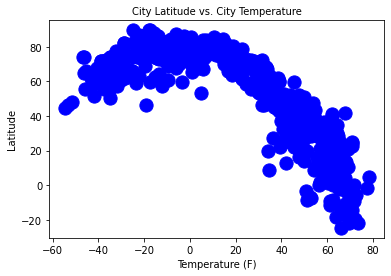

In [18]:
# Build a scatterplot for latitude vs Temperature
plt.scatter(weather_data["Lat"], weather_data["Temperature"],s=175, color="blue")
plt.title("City Latitude vs. City Temperature", fontsize = 10)
plt.xlabel("Temperature (F)", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)


plt.savefig("../images/LatitudevsTemperature_Scatterplot.png")
plt.show()


## Latitude vs. Humidity Plot

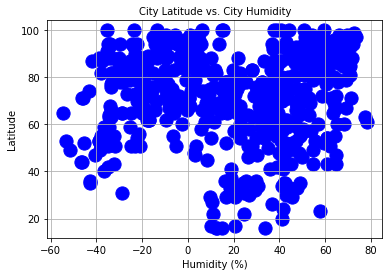

In [19]:
# Build a scatterplot for latitude vs Humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"],s=175, color="blue")
plt.title("City Latitude vs. City Humidity", fontsize = 10)
plt.xlabel("Humidity (%)", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)
plt.grid(True)


plt.savefig("../images/LatitudevsHumidity_Scatterplot.png")
plt.show()

## Latitude vs. Cloudiness Plot

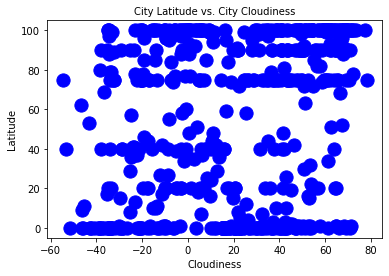

In [20]:
# Build a scatterplot for latitude vs Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"],s=175, color="blue")
plt.title("City Latitude vs. City Cloudiness", fontsize = 10)
plt.xlabel("Cloudiness", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)
plt.grid=(True)

plt.savefig("../images/LatitudevsCloudiness_Scatterplot.png")
plt.show()

## Latitude vs. Wind Speed Plot

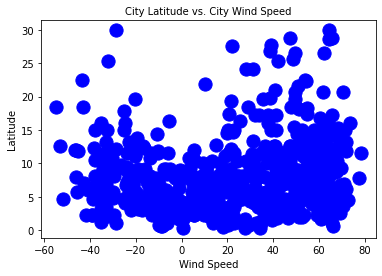

In [21]:
# Build a scatterplot for latitude vs Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"],s=175, color="blue")
plt.title("City Latitude vs. City Wind Speed", fontsize = 10)
plt.xlabel("Wind Speed", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)

plt.savefig("../images/Latitudevswind_speed_Scatterplot.png")
plt.show()

## Linear Regression

In [22]:
Northhem_df = weather_data.loc[weather_data['Lat'] > 0] 
Northhem_df.head()

,Lat,Lng,Temperature,Cloudiness,Country,Date,Humidity,Temperature Max,Wind Speed,City Number,City Name
0,31.2089,16.5887,61.03,98,LY,1615683886,64,61.03,13.42,2210554,Sirte
2,64.2539,-15.2082,35.08,99,IS,1615683886,55,35.08,10.13,2630299,Hofn
4,34.5667,76.1000,8.96,100,IN,1615683887,73,8.96,1.34,1267776,Kargil
9,48.4167,-2.2500,39.06,90,FR,1615683889,87,39.20,9.22,3021353,Arrondissement de Dinan
10,20.5022,-10.0711,67.15,0,MR,1615683889,17,67.15,8.86,2381972,Adrar


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

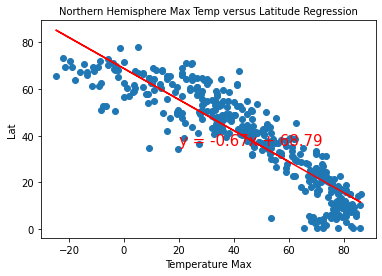

In [23]:
# Linear Regression
x_values = Northhem_df['Temperature Max']
y_values = Northhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere Max Temp versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.xlabel('Temperature Max')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_North_MaxTemp_Latitude.png')
print()
plt.show()

In [24]:
Southhem_df = weather_data.loc[weather_data['Lat'] < 0] 
Southhem_df.head()

,Lat,Lng,Temperature,Cloudiness,Country,Date,Humidity,Temperature Max,Wind Speed,City Number,City Name
1,-23.1203,-134.9692,80.51,37,PF,1615683886,73,80.51,8.70,4030556,Rikitea
3,-22.2953,-53.2711,75.78,37,BR,1615683887,70,75.78,3.83,3470338,Bataiporã
5,-24.8667,113.6333,89.60,36,AU,1615683888,51,89.60,16.11,2074865,Carnarvon
6,-33.6500,115.3333,61.23,0,AU,1615683803,66,62.01,5.99,2075265,Busselton
7,-20.3167,118.5667,84.20,100,AU,1615683888,70,84.20,19.57,2063042,Port Hedland


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

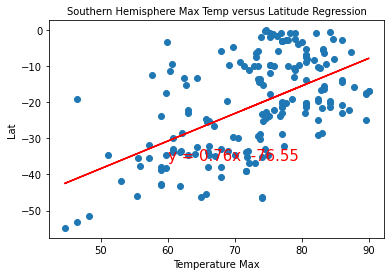

In [25]:
# Linear Regression
x_values = Southhem_df['Temperature Max']
y_values = Southhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere Max Temp versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (60,-36), fontsize=15,color="red")
plt.xlabel('Temperature Max')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_South_MaxTemp_Latitude.png')
print()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

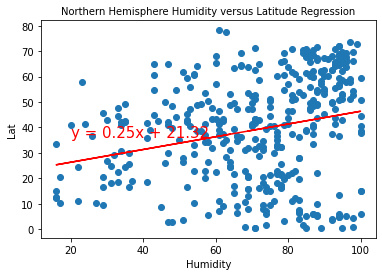

In [26]:
# Linear Regression
x_values = Northhem_df['Humidity']
y_values = Northhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere Humidity versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_North_Humidity_Latitude.png')
print()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Linear Regression
x_values = Southhem_df['Humidity']
y_values = Southhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere Humidity versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (60,-36), fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_South_Humidity_Latitude.png')
print()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

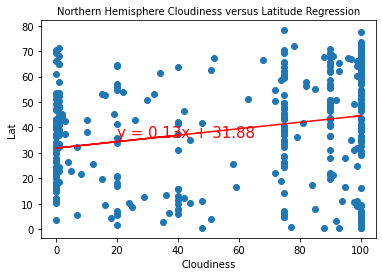

In [27]:
# Linear Regression
x_values = Northhem_df['Cloudiness']
y_values = Northhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere Cloudiness versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_North_Cloudiness_Latitude.png')
print()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

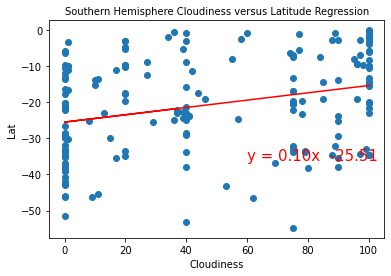

In [28]:
# Linear Regression
x_values = Southhem_df['Cloudiness']
y_values = Southhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere Cloudiness versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (60,-36), fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_South_Cloudiness_Latitude.png')
print()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

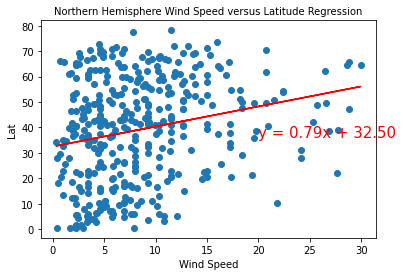

In [29]:
# Linear Regression
x_values = Northhem_df['Wind Speed']
y_values = Northhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere Wind Speed versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_Northern Hemisphere_Wind_Speed_Latitude.png')
print()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

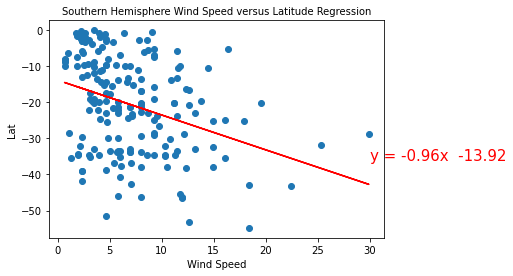

In [30]:
# Linear Regression
x_values = Southhem_df['Wind Speed']
y_values = Southhem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere Wind Speed versus Latitude Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (30,-36), fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.savefig('../images/linearregression_South_Wind_Speed_Latitude.png')
print()
plt.show()